<strong>TUTORIAL - APACHE BEAM</strong>

Material construído com base no curso disponível em https://www.udemy.com/course/apache-beam-a-hands-on-course-to-build-big-data-pipelines

**Autor do curso**: https://www.linkedin.com/in/jgarg1/

**Autor do Notebook**: José Guilherme Rizzo de Barros

**Linkedin**: https://www.linkedin.com/in/jos%C3%A9-guilherme-rizzo-de-barros-b04888146/

**Github**: https://github.com/jose-guilherme-97

# Instalando o Apache Beam - configurações iniciais

In [ ]:
!pip install apache-beam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.3/671.3 kB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 45.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 31.3 MB/s eta 

<strong>Criação de diretório</strong>

Criação de diretório para armazenar dados a serem utilizados nas pipelines.

In [ ]:
!{'mkdir -p data'}

In [ ]:
!ls

cards.txt  data  loan.txt  sample_data


<strong>Criando conexão com o Google Drive</strong>

Forma alternativa de ler arquivos sem precisar subir diretamente neste ambiente

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

# <strong>Criando a primeira Pipeline</strong>

De forma geral, um script no Apache Beam é composto por um processo lógico de criação, que trata desde da instanciação do pacote até a estruturação das etapas de processamento. Assim, no exemplo abaixo temos a seguinte estrutura lógica:
* Importação da biblioteca apache_beam com o apelido "beam".
* Definição das funções auxiliares que substituem as funções lambda utilizadas no processo de Map e Filter das transformações.
* Instância de p1, que chama o método Pipeline.
* Definição do fluxo: leitura do dado bruto como texto, segmentação do dado bruto através de um split pelo separador, filtro do dado para captar apenas o evento de interesse, Map para distribuir as ocorrências de certa coluna e por fim um agrupamento dessas informações, transformando a operação em uma contagem. Os resultados são então salvos no caminho especificado.
* Comando para rodar a pipeline
* Comando para apresentar alguns dos resultados para o usuário.

In [ ]:
import apache_beam as beam

def SplitRow(element):
    return element.split(',')

def filtering(record):
  return record[3] == 'Accounts'


p1 = beam.Pipeline()

attendance_count = (

   p1
    |beam.io.ReadFromText('/content/data/dept_data.txt')
    |beam.Map(SplitRow)
   #| beam.Map(lambda record: record.split(','))

    |beam.Filter(filtering)
  # |beam.Filter(lambda record: record[3] == 'Accounts')

    |beam.Map(lambda record: (record[1], 1))
    |beam.CombinePerKey(sum)

    |beam.io.WriteToText('/content/data/output_new_final')

)

p1.run()

# Sample the first 20 results, remember there are no ordering guarantees.
!{('head -n 20 data/output_new_final-00000-of-00001')}

('Marco', 31)
('Rebekah', 31)
('Itoe', 31)
('Edouard', 31)
('Kyle', 62)
('Kumiko', 31)
('Gaston', 31)
('Ayumi', 30)


## <strong>Forma Alternativa</strong>

É possível construir pipelines utilizando uma sintaxe distinta da apresentada no exemplo anterior. Além disso, pode-se nomer determinada etapa do fluxo de dados. Esta prática possibilita maior organização e auxilia o processo de debug.

In [ ]:
import apache_beam as beam

def SplitRow(element):
    return element.split(',')

def filtering(record):
  return record[3] == 'Accounts'


with beam.Pipeline() as p1:

  attendance_count = (

    p1
      |'Read from File' >> beam.io.ReadFromText('/content/data/dept_data.txt')
      |'Split by Comma' >> beam.Map(SplitRow)
    #| beam.Map(lambda record: record.split(','))

      |'Filtering by Accounts' >> beam.Filter(filtering)
    # |beam.Filter(lambda record: record[3] == 'Accounts')

      |'Mapping by name' >> beam.Map(lambda record: (record[1], 1))
      |'Group by Operation' >> beam.CombinePerKey(sum)

      |'Saving Results' >> beam.io.WriteToText('/content/data/output_new_final')

  )
# Sample the first 20 results, remember there are no ordering guarantees.
!{('head -n 20 data/output_new_final-00000-of-00001')}

('Marco', 31)
('Rebekah', 31)
('Itoe', 31)
('Edouard', 31)
('Kyle', 62)
('Kumiko', 31)
('Gaston', 31)
('Ayumi', 30)


# <strong>Gerando dados</strong>

Através do Apache Beam, é possível não apenas ler dados de múltiplas fontes, como também gerar dados artificiais segundo vários formatos. A seguir há alguns exemplos de código no qual criam-se diferentes arquivos texto com conteúdo variado.

In [ ]:
import apache_beam as beam

p2 = beam.Pipeline()

lines = (
            p2
            | beam.Create([
               'Using create transform ',
               'to generate in memory data ',
               'This is 3rd line ',
               'Thanks '])

            | beam.io.WriteToText('/content/data/outCreate1')
          )
p2.run()

# visualize output
!{('head -n 20 data/outCreate1-00000-of-00001')}


Using create transform 
to generate in memory data 
This is 3rd line 
Thanks 


In [ ]:
import apache_beam as beam

p3 = beam.Pipeline()

lines1 = (p3

           | beam.Create([1,2,3,4,5,6,7,8,9])

           | beam.io.WriteToText('/content/data/outCreate2')
          )
p3.run()

# visualize output
!{('head -n 20 data/outCreate2-00000-of-00001')}

1
2
3
4
5
6
7
8
9


In [ ]:
import apache_beam as beam

p4 = beam.Pipeline()


lines = (p4
           | beam.Create([("maths",52),("english",75),("science",82), ("computer",65),("maths",85)])

            | beam.io.WriteToText('/content/data/outCreate3')
          )
p4.run()

# visualize output
!{('head -n 20 data/outCreate3-00000-of-00001')}

('maths', 52)
('english', 75)
('science', 82)
('computer', 65)
('maths', 85)


In [ ]:
import apache_beam as beam

p5 = beam.Pipeline()

lines = ( p5

       | beam.Create({'row1':[1,2,3,4,5],
                     'row2':[1,2,3,4,5]})
       | beam.Map(lambda element: element)
       | beam.io.WriteToText('/content/data/outCreate4')
  )

p5.run()

# visualize output
!{('head -n 20 data/outCreate4-00000-of-00001')}

('row1', [1, 2, 3, 4, 5])
('row2', [1, 2, 3, 4, 5])


# <strong>Principais Transformações e Métodos</strong>

## <strong>Branching Pipelines</strong>

Esta técnica é muito útil em cenários no qual há múltiplas operações a serem realizadas de diferentes contextos que consomem uma fonte comum.

No exemplo abaixo, define-se a Pipeline P e então os processos são divididos de acordo com o escopo de cada processamento. Primeiramente, uma collection chamada input_collection é criada com o objetivo de realizar a leitura do dado bruto. A partir desta etapa comum, faz-se necessário segregar os processos por departamento (Accounts e HR). Embora, no exemplo, as operações realizadas sejam as mesmas, poderiam não ser, reforçando a necessidade de branches separadas para o tratamento de cada setor. O tratamento (contagem) para cada departamento é feito pelas collections accounts_count e hr_count, que dependem da input_collection e por não terem relação entre si, podem ser executadas de forma paralela.

Por fim, a collection denominada output realiza um merge entre as collections de transformação (através da linha de código (accounts_count, hr_count)) e então utiliza o método Flatten, para compor em um único arquivo o resultado de ambos os processamentos. Vale ressaltar que o processo de Merge só é realizado porque ambos os tratamentos possuem na saída a mesma quantidade de colunas e tipo de dados.

In [ ]:
import apache_beam as beam

def SplitRow(element):
    return element.split(',')

p = beam.Pipeline()


input_collection = (
                      p
                      | "Read from text file" >> beam.io.ReadFromText('/content/data/dept_data.txt')
                      | "Split rows" >> beam.Map(SplitRow)
                   )

accounts_count = (
                      input_collection
                      | 'Get all Accounts dept persons' >> beam.Filter(lambda record: record[3] == 'Accounts')
                      | 'Pair each accounts employee with 1' >> beam.Map(lambda record: ("Accounts, " +record[1], 1))
                      | 'Group and sum1' >> beam.CombinePerKey(sum)
                    #  | 'Write results for account' >> beam.io.WriteToText('data/Account')
                 )

hr_count = (
                input_collection
                | 'Get all HR dept persons' >> beam.Filter(lambda record: record[3] == 'HR')
                | 'Pair each hr employee with 1' >> beam.Map(lambda record: ("HR, " +record[1], 1))
                | 'Group and sum' >> beam.CombinePerKey(sum)
                #| 'Write results for hr' >> beam.io.WriteToText('data/HR')
           )

output =(
         (accounts_count,hr_count)
    | beam.Flatten()
    | beam.io.WriteToText('/content/data/both')
)



p.run()

# Sample the first 20 results, remember there are no ordering guarantees.
!{('head -n 20 data/both-00000-of-00001')}


#!{('head -n 20 data/HR-00000-of-00001')}

('Accounts, Marco', 31)
('Accounts, Rebekah', 31)
('Accounts, Itoe', 31)
('Accounts, Edouard', 31)
('Accounts, Kyle', 62)
('Accounts, Kumiko', 31)
('Accounts, Gaston', 31)
('Accounts, Ayumi', 30)
('HR, Beryl', 62)
('HR, Olga', 31)
('HR, Leslie', 31)
('HR, Mindy', 31)
('HR, Vicky', 31)
('HR, Richard', 31)
('HR, Kirk', 31)
('HR, Kaori', 31)
('HR, Oscar', 31)


## <strong>Tarefa</strong>

Realizar uma contagem de palavras a partir de um texto que simula uma peça teatral.

Como a única demanda é por uma contagem bruta de palavras, maiores tratamentos não foram realizados. O ideal seria passar todo o texto por um processo de remoção de stopwords para deixá-lo somente com o conteúdo principal e relevante.

In [ ]:
# Versão feita pelo autor do Notebook
import apache_beam as beam

p = beam.Pipeline()

def clean_text(element):
  #print(element)
  element = element.translate(str.maketrans('','',"\n:,!.;[]()\t|''`´'"))
  return element.upper().split(' ')

word_count = (
    p
    |beam.io.ReadFromText('/content/data/data.txt')
    #|beam.Map(lambda element: element.replace('\n', ' '))
    |beam.FlatMap(clean_text)
    |beam.Map(lambda element: (element, 1))
    |beam.CombinePerKey(sum)
    |beam.io.WriteToText('data/homework')
)

p.run()
!{('head -n 20 data/homework-00000-of-00001')}

('KING', 300)
('LEAR', 64)
('', 2232)
('DRAMATIS', 1)
('PERSONAE', 1)
('LEARKING', 1)
('OF', 479)
('BRITAIN', 1)
('FRANCE', 25)
('DUKE', 25)
('BURGUNDYBURGUNDY', 1)
('CORNWALLCORNWALL', 1)
('ALBANYALBANY', 1)
('EARL', 10)
('KENTKENT', 1)
('GLOUCESTERGLOUCESTER', 1)
('EDGARSON', 1)
('TO', 555)
('GLOUCESTER', 46)
('EDMUNDBASTARD', 1)


## <strong>ParDo</strong>

Transformações do tipo ParDo são generalizações dos métodos (Filter, Map, FlatMap) vistos até o momento. Permitem ao desenvolvedor flexibilidade para a criação de pipelines com funções particulares para tratamento da informação.

Para utilizá-lo, basta substituir as antigas funções de tratamento por classes que herdam a classe beam.DoFn. Isto permite com que a operação distribuída e paralelizada ocorra em diferentes clusters.

Por fim, para tornar o objeto retornado como uma lista, basta adicionar no return de uma função colchetes encapsulando o objeto de retorno. A não existência de colchetes provoca um retorno padrão no estilo FlatMap, no qual cada elemento corresponde a uma nova linha.

In [ ]:
import apache_beam as beam

class SplitRow(beam.DoFn):

  def process(self, element):
    # return type -> list
    return  [element.split(',')]


class FilterAccountsEmployee(beam.DoFn):

  def process(self, element):
    if element[3] == 'Accounts':
      return [element]

class PairEmployees(beam.DoFn):

  def process(self, element):
    return [(element[3]+","+element[1], 1)]

class Counting(beam.DoFn):

  def process(self, element):
    # return type -> list
    (key, values) = element           # [Marco, Accounts  [1,1,1,1....] , Rebekah, Accounts [1,1,1,1,....] ]
    return [(key, sum(values))]


p1 = beam.Pipeline()

attendance_count = (

   p1
    |beam.io.ReadFromText('data/dept_data.txt')

    |beam.ParDo(SplitRow())
   # | 'Compute WordLength' >> beam.ParDo(lambda element: [ element.split(',') ])

    |beam.ParDo(FilterAccountsEmployee())
    |beam.ParDo(PairEmployees())
    | 'Group ' >> beam.GroupByKey()
    | 'Sum using ParDo' >> beam.ParDo(Counting())

    |beam.io.WriteToText('data/output_new_final')

)

p1.run()

# Sample the first 20 results, remember there are no ordering guarantees.
!{('head -n 20 data/output_new_final-00000-of-00001')}

('Accounts,Marco', 31)
('Accounts,Rebekah', 31)
('Accounts,Itoe', 31)
('Accounts,Edouard', 31)
('Accounts,Kyle', 62)
('Accounts,Kumiko', 31)
('Accounts,Gaston', 31)
('Accounts,Ayumi', 30)


## <strong>Combiner</strong>

A ideia deste método é tornar possível a computação de operações cujo o resultado final precisar ser centralizado em uma camada unificada de Reducer. Em outras palavras, algumas operações (média por exemplo) podem ser influenciadas negativamente pelo cálculo distribuído. Imagine a existência de uma lista de números ao qual deseja-se computar a média. Caso esta operação seja distribuída entre clusters e o cálculo seja feito por cluster e posteriormente um cálculo final (média das médias) na unidade de Reducer, teremos imprecisões no cálculo.

Para solucionar esta questão, o método **Combiner** busca definir uma classe para a operação desejada, com a presença de quatro funções básicas:

* create_accumulator: um método para inicializar a contagem ou computação de algo em uma unidade de processamento.
* add_input: método que atualiza o acumulador criado.
* merge_accumulators: método que consolida as informações computadas em cada partição (respeitando a posição de cada elemento na tupla)
* extract_output: método que realiza o cálculo final, retornando o valor correto objetivado.

In [ ]:
import apache_beam as beam

p = beam.Pipeline()

class AverageFn(beam.CombineFn):

  def create_accumulator(self):
     return (0.0, 0)   # initialize (sum, count)

  def add_input(self, sum_count, input):
    (sum, count) = sum_count
    return sum + input, count + 1

  def merge_accumulators(self, accumulators):

    ind_sums, ind_counts = zip(*accumulators)       # zip - [(27, 3), (39, 3), (18, 2)]  -->   [(27,39,18), (3,3,2)]
    return sum(ind_sums), sum(ind_counts)        # (84,8)

  def extract_output(self, sum_count):

    (sum, count) = sum_count    # combine globally using CombineFn
    return sum / count if count else float('NaN')


small_sum = (
           p
            | beam.Create([15,5,7,7,9,23,13,5])
            | "Combine Globally" >> beam.CombineGlobally(AverageFn())
            | 'Write results' >> beam.io.WriteToText('data/combine')
          )
p.run()

# Sample the first 20 results, remember there are no ordering guarantees.
!{'head -n 20 data/combine-00000-of-00001'}

10.5


## <strong>Composite-Transform</strong>

Composite-Transform trata de um método que torna o código mais compreensível, legível e reduzido. Seu objetivo é concentrar as transformações comuns a pipelines distintas em uma única classe. Assim, conforme as necessidades de composição de operações vão surgindo, ao invés de alterar e adicionar uma PCollection em cada pipeline, aumentando as linhas de código e dificultando o debug, basta adicionar estas transformações na classe que concentra toda a operação necessária e então chamar pela classe em cada pipeline envolvida.

In [ ]:
import apache_beam as beam

class MyTransform(beam.PTransform):

  def expand(self, input_col):

    a = (
        input_col
                       | 'Group and sum1' >> beam.CombinePerKey(sum)
                       | 'count filter accounts' >> beam.Filter(filter_on_count)
                       | 'Regular accounts employee' >> beam.Map(format_output)

    )
    return a

def SplitRow(element):
    return element.split(',')


def filter_on_count(element):
  name, count = element
  if count > 30:
    return element

def format_output(element):
  name, count = element
  #return ', '.join((name.encode('ascii'),str(count),'Regular employee'))
  return ', '.join((name,str(count),'Regular employee'))

p = beam.Pipeline()

input_collection = (
                      p
                      | "Read from text file" >> beam.io.ReadFromText('data/dept_data.txt')
                      | "Split rows" >> beam.Map(SplitRow)
                   )

accounts_count = (
                      input_collection
                      | 'Get all Accounts dept persons' >> beam.Filter(lambda record: record[3] == 'Accounts')
                      | 'Pair each accounts employee with 1' >> beam.Map(lambda record: ("Accounts, " +record[1], 1))
                      | 'composite accoubts' >> MyTransform()
                      | 'Write results for account' >> beam.io.WriteToText('data/Account')
                 )

hr_count = (
                input_collection
                | 'Get all HR dept persons' >> beam.Filter(lambda record: record[3] == 'HR')
                | 'Pair each hr employee with 1' >> beam.Map(lambda record: ("HR, " +record[1], 1))
                | 'composite HR' >> MyTransform()
                | 'Write results for hr' >> beam.io.WriteToText('data/HR')
           )
p.run()

# Sample the first 20 results, remember there are no ordering guarantees.
!{('head -n 20 data/Account-00000-of-00001')}
!{('head -n 20 data/HR-00000-of-00001')}

Accounts, Marco, 31, Regular employee
Accounts, Rebekah, 31, Regular employee
Accounts, Itoe, 31, Regular employee
Accounts, Edouard, 31, Regular employee
Accounts, Kyle, 62, Regular employee
Accounts, Kumiko, 31, Regular employee
Accounts, Gaston, 31, Regular employee
HR, Beryl, 62, Regular employee
HR, Olga, 31, Regular employee
HR, Leslie, 31, Regular employee
HR, Mindy, 31, Regular employee
HR, Vicky, 31, Regular employee
HR, Richard, 31, Regular employee
HR, Kirk, 31, Regular employee
HR, Kaori, 31, Regular employee
HR, Oscar, 31, Regular employee


## <strong>CoGroupBy</strong>

CoGroupBy é uma forma de realizar join entre pipelines que consomem arquivos diferentes. Para tal, a estratégia é particionar as informações de ambos os arquivos por uma chave comum. posteriormente, organizar as pipelines como valores de um dicionário no qual as chaves identificam sua origem e por fim, executar CoGroupByKey(). Isto faz com que o arquivo resultante seja identificado pelo ID utilizado a cada linha, unificando todas as informações contidas para este ID de todos as fontes em uma só linha.

Em python, ainda não há uma grande quantidade de Joins possíveis implementados. O desenvolvedor até o presente momento (Outubro de 2023) precisa codificar a parte caso queira um tipo de join específico.

Por padrão, realiza-se um full outer join.

In [ ]:
import apache_beam as beam

def retTuple(element):

  thisTuple=element.split(',')
  return (thisTuple[0],thisTuple[1:])

p1 = beam.Pipeline()

# Apply a ParDo to the PCollection "words" to compute lengths for each word.
dep_rows = (
                p1
                | "Reading File 1" >> beam.io.ReadFromText('data/dept_data.txt')
                | 'Pair each employee with key' >> beam.Map(retTuple)          # {149633CM : [Marco,10,Accounts,1-01-2019]}

               )


loc_rows = (
                p1
                | "Reading File 2" >> beam.io.ReadFromText('data/location.txt')
                | 'Pair each loc with key' >> beam.Map(retTuple)                # {149633CM : [9876843261,New York]}
               )


results = ({'dep_data': dep_rows, 'loc_data': loc_rows}

           | beam.CoGroupByKey()
           | 'Write results' >> beam.io.WriteToText('data/result')
          )


p1.run()

!{('head -n 20 data/result-00000-of-00001')}

('149633CM', {'dep_data': [['Marco', '10', 'Accounts', '1-01-2019'], ['Marco', '10', 'Accounts', '2-01-2019'], ['Marco', '10', 'Accounts', '3-01-2019'], ['Marco', '10', 'Accounts', '4-01-2019'], ['Marco', '10', 'Accounts', '5-01-2019'], ['Marco', '10', 'Accounts', '6-01-2019'], ['Marco', '10', 'Accounts', '7-01-2019'], ['Marco', '10', 'Accounts', '8-01-2019'], ['Marco', '10', 'Accounts', '9-01-2019'], ['Marco', '10', 'Accounts', '10-01-2019'], ['Marco', '10', 'Accounts', '11-01-2019'], ['Marco', '10', 'Accounts', '12-01-2019'], ['Marco', '10', 'Accounts', '13-01-2019'], ['Marco', '10', 'Accounts', '14-01-2019'], ['Marco', '10', 'Accounts', '15-01-2019'], ['Marco', '10', 'Accounts', '16-01-2019'], ['Marco', '10', 'Accounts', '17-01-2019'], ['Marco', '10', 'Accounts', '18-01-2019'], ['Marco', '10', 'Accounts', '19-01-2019'], ['Marco', '10', 'Accounts', '20-01-2019'], ['Marco', '10', 'Accounts', '21-01-2019'], ['Marco', '10', 'Accounts', '22-01-2019'], ['Marco', '10', 'Accounts', '23-01-2

# <strong>Side Inputs</strong>

Side Inputs são entradas adicionais permitidas além do input original em uma dada transformação em um pipeline. No exemplo abaixo, representa uma lista com alguns IDs que devem ser excluídos da análise a ser realizada. Tal análise leva em conta ainda uma condição de filtro dos elementos baseados no comprimento do nome na base de dados. Para criar esta abordagem particular, utiliza-se o conceito de ParDo.

In [ ]:
import apache_beam as beam

side_list=list()
with open ('data/exclude_ids.txt','r') as my_file:
  for line in my_file:
    side_list.append(line.rstrip())

p = beam.Pipeline()

# We can pass side inputs to a ParDo transform, which will get passed to its process method.
# The first two arguments for the process method would be self and element.

class FilterUsingLength(beam.DoFn):
  def process(self, element,side_list,lower_bound, upper_bound=float('inf')):
    id = element.split(',')[0]
    name = element.split(',')[1]
    element_list= element.split(',')
    if (lower_bound <= len(name) <= upper_bound) and id not in side_list:
      return [element_list]

# using pardo to filter names with length between 3 and 10
small_names =(
                p
                | "Read from text file" >> beam.io.ReadFromText('data/dept_data.txt')
                | "ParDo with side inputs" >> beam.ParDo(FilterUsingLength(),side_list,3,10)
                | beam.Filter(lambda record: record[3] == 'Accounts')
                | beam.Map(lambda record: (record[0]+ " " + record[1], 1))
                | beam.CombinePerKey(sum)
                | 'Write results' >> beam.io.WriteToText('data/output_new_final')
             )

p.run()

!{('head -n 20 data/output_new_final-00000-of-00001')}

('503996WI Edouard', 31)
('957149WC Kyle', 31)
('241316NX Kumiko', 31)
('796656IE Gaston', 31)
('718737IX Ayumi', 30)


# <strong>Additional Outputs</strong>

Técnica utilizada quando necessário compor múltiplos outputs como resultado de uma pipeline. No exemplo a seguir, temos três possíveis outputs baseados no nome lido em um dado elemento. O processo é controlado utilizando ParDo através da classe ProcessWords. Com ela, torna-se possível classificar os nomes lidos com base em seu comprimento ou pela verificação de sua letra inicial. Assim, cada elemento processado recebe um marcador que categoriza-o em relação a qual output pertence. Com isso, pode-se criar distintas PCollections para salvar os resultados de maneira independente.

In [ ]:
import apache_beam as beam

# DoFn function
class ProcessWords(beam.DoFn):

  def process(self, element, cutoff_length, marker):

    name = element.split(',')[1]

    if not name.startswith(marker):
      if len(name) <= cutoff_length:
        return [beam.pvalue.TaggedOutput('Short_Names', name)]

      else:
        return [beam.pvalue.TaggedOutput('Long_Names', name)]

    else:
      return [name]


p = beam.Pipeline()


results = (
            p
            | beam.io.ReadFromText('data/dept_data.txt')

            | beam.ParDo(ProcessWords(), cutoff_length=4, marker='A').with_outputs('Short_Names', 'Long_Names', main='Names_A')

          )

short_collection = results.Short_Names
long_collection = results.Long_Names
startA_collection = results.Names_A

# write to file
short_collection | 'Write 1'>> beam.io.WriteToText('short')

# write to file
long_collection | 'Write 2'>> beam.io.WriteToText('long')

# write to file
startA_collection | 'Write 3'>> beam.io.WriteToText('start_a')

p.run()

!{'head -n 5 short-00000-of-00001'}
!{'head -n 5 long-00000-of-00001'}
!{'head -n 5 start_a-00000-of-00001'}


Itoe
Kyle
Kyle
Olga
Kirk
Marco
Rebekah
Edouard
Kumiko
Gaston
Ayumi
Ayumi
Ayumi
Ayumi
Ayumi


# <strong>Real Time Case Study - Inadimplência Bancária</strong>

No problema a seguir temos dois cenários de inadimplência financeira. No primeiro, a base cards.txt nos traz informações a respeito de atrasos de pagamento na fatura de cartão de crédito e a segunda base, loan.txt, um recorte de inadimplência em tomada de empréstimo.

Com isso, busca-se criar uma pipeline de tratamento de dados que consolide e auxilie o banco a identificar maus pagadores.Para tal, um conjunto de regras é aplicado e algumas características das bases auxiliam na construção da solução do problema. A lógica é descrita abaixo:

**Para tratamento da base cards**

* O cliente recebe um ponto caso o valor pago represente menos que 70% da dívida existente.

* O cliente recebe um ponto caso tenha gasto seu limite máximo mensal e não tenha pago em totalidade.

* Caso um cliente atenda as duas condições acima, recebe um ponto adicional.

**Tratamento da base loan**

* Para esta base, o banco não aceita atrasos em pagamentos de empréstimos pessoais, apenas médicos. Isto implica que em caso de inadimplência, o mês inadimplente para dado cliente não estará na base.

* Considera-se inadimplente o cliente que tomou empréstimo médico e atrasou 3 ou mais vezes o pagamento.

* Considera-se inadimplemente o cliente que tomou empréstimo pessoal e atrasou 4 ou mais prestações, ou então atrasou por dois meses consecutivos.

## <strong>VERSÃO DO INSTRUTOR DO CURSO</strong>

In [ ]:
import apache_beam as beam

# for datetime manipulation
from datetime import datetime

p = beam.Pipeline()

def calculate_points(element):

  customer_id, first_name, last_name, realtionship_id, card_type, max_limit, spent, cash_withdrawn,payment_cleared,payment_date = element.split(',')
  #[CT28383,Miyako,Burns,R_7488,Issuers,500,490,38,101,30-01-2018]

  spent = int(spent)    # spent = 490
  payment_cleared = int(payment_cleared)   #payment_cleared = 101
  max_limit = int(max_limit)               # max_limit = 500

  key_name = customer_id + ', ' + first_name + ' ' + last_name     # key_name = CT28383,Miyako Burns
  defaulter_points = 0

  # payment_cleared is less than 70% of spent - give 1 point
  if payment_cleared < (spent * 0.7):
     defaulter_points += 1                                                # defaulter_points =  1

  # spend is = 100% of max limit and any amount of payment is pending
  if (spent == max_limit) and (payment_cleared < spent):
     defaulter_points += 1                                                # defaulter_points =  2

  if (spent == max_limit) and (payment_cleared < (spent*0.7)):
     defaulter_points += 1                                                # defaulter_points = 3

  return key_name, defaulter_points                                     # {CT28383,Miyako Burns  3}

def format_result(sum_pair):
  key_name, points = sum_pair
  return str(key_name) + ', ' + str(points) + ' fraud_points'

def calculate_late_payment(elements):               # [CT88330,Humberto,Banks,Serviceman,LN_1559,Medical Loan,26-01-2018,2000,30-01-2018]

  due_date = datetime.strptime(elements[6].rstrip().lstrip(), '%d-%m-%Y')           # due_date = 26-01-2018
  payment_date = datetime.strptime(elements[8].rstrip().lstrip(), '%d-%m-%Y')       # payment_date = 30-01-2018

  if payment_date <= due_date:
    elements.append('0')
  else:
    elements.append('1')                           # [CT88330,Humberto,Banks,Serviceman,LN_1559,Medical Loan,26-01-2018,2000,30-01-2018,1]

  return elements

def format_output(sum_pair):
  key_name, miss_months = sum_pair
  return str(key_name) + ', ' + str(miss_months) + ' missed'

def calculate_month(input_list):        #input  [CT88330,Humberto,Banks,Serviceman,LN_1559,Medical Loan,26-01-2018, 2000, 30-01-2018]

  # Convert payment_date to datetime and extract month of payment
  payment_date = datetime.strptime(input_list[8].rstrip().lstrip(), '%d-%m-%Y')  # payment_date = 30-01-2018
  input_list.append(str(payment_date.month))                                     # [CT88330,Humberto,Banks,Serviceman,LN_1559,Medical Loan,26-01-2018, 2000, 30-01-2018, 01]

  return input_list

def calculate_personal_loan_defaulter(input):       #input key -> CT68554,Ronald Chiki   value --> [01,05,06,07,08,09,10,11,12]
    max_allowed_missed_months = 4
    max_allowed_consecutive_missing = 2

    name, months_list = input                                   # [CT68554,Ronald,Chiki,Serviceman,LN_8460,Personal Loan,25-01-2018,50000,25-01-2018]

    months_list.sort()
    sorted_months = months_list                                 # sorted_months = [01,05,06,07,08,09,10,11,12]
    total_payments = len(sorted_months)                         # total_payments = 10

    missed_payments = 12 - total_payments                       # missed_payments = 2

    if missed_payments > max_allowed_missed_months:             # false
       return name, missed_payments                             #  N/A

    consecutive_missed_months = 0

    temp = sorted_months[0] - 1                                 # temp = 0
    if temp > consecutive_missed_months:                        # false
        consecutive_missed_months = temp                        #NA

    temp = 12 - sorted_months[total_payments-1]
    if temp > consecutive_missed_months:
        consecutive_missed_months = temp                        # temp = 0

    for i in range(1, len(sorted_months)):                      # [01,05,06,07,08,09,10,11,12]
        temp = sorted_months[i] - sorted_months[i-1] -1         # temp = 5-1-1 = 3
        if temp > consecutive_missed_months:
            consecutive_missed_months = temp                    # consecutive_missed_months = 3

    if consecutive_missed_months > max_allowed_consecutive_missing:
       return name, consecutive_missed_months                   # CT68554,Ronald Chiki   3

    return name, 0

def return_tuple(element):
  thisTuple=element.split(',')
  return (thisTuple[0],thisTuple[1:])

card_defaulter = (
                  p
                  | 'Read credit card data' >> beam.io.ReadFromText('cards.txt',skip_header_lines=1)
                  | 'Calculate defaulter points' >> beam.Map(calculate_points)
                  | 'Combine points for defaulters' >> beam.CombinePerKey(sum)                            # key--> CT28383,Miyako Burns   value --> 6
                  | 'Filter card defaulters' >> beam.Filter(lambda element: element[1] > 0)
                  | 'Format output' >> beam.Map(format_result)                                            # CT28383,Miyako Burns,6 fraud_points
                 # | 'Write credit card data' >> beam.io.WriteToText('outputs/card_skippers')
                  | 'tuple ' >> beam.Map(return_tuple)
                  )

medical_loan_defaulter = (
                            p
                            |  beam.io.ReadFromText('loan.txt',skip_header_lines=1)   # 1stRow--> CT88330,Humberto,Banks,Serviceman,LN_1559,Medical Loan,26-01-2018, 2000, 30-01-2018
                            | 'Split Row' >> beam.Map(lambda row : row.split(','))
                            | 'Filter medical loan' >> beam.Filter(lambda element : (element[5]).rstrip().lstrip() == 'Medical Loan')
                            | 'Calculate late payment' >> beam.Map(calculate_late_payment)
                            | 'Make key value pairs' >> beam.Map(lambda elements: (elements[0] + ', ' + elements[1]+' '+elements[2], int(elements[9])) )
                            | 'Group medical loan based on month' >> beam.CombinePerKey(sum)                       # key--> (CT88330,Humberto Banks)  value --> 7
                            | 'Check for medical loan defaulter' >> beam.Filter(lambda element: element[1] >= 3)
                            | 'Format medical loan output' >> beam.Map(format_output)      # CT88330,Humberto Banks,7 missed
                         )

personal_loan_defaulter = (
                            p
                            | 'Read' >> beam.io.ReadFromText('loan.txt',skip_header_lines=1)
                            | 'Split' >> beam.Map(lambda row : row.split(','))
                            | 'Filter personal loan' >> beam.Filter(lambda element : (element[5]).rstrip().lstrip() == 'Personal Loan')
                            | 'Split and Append New Month Column' >> beam.Map(calculate_month)
                            | 'Make key value pairs loan' >> beam.Map(lambda elements: (elements[0] + ', ' + elements[1]+' '+elements[2], int(elements[9])) )
                            | 'Group personal loan based on month' >> beam.GroupByKey()                                  # CT68554,Ronald Chiki [01,05,06,07,08,09,10,11,12]
                            | 'Check for personal loan defaulter' >> beam.Map(calculate_personal_loan_defaulter)          # CT68554,Ronald Chiki   3
                            | 'Filter only personal loan defaulters' >> beam.Filter(lambda element: element[1] > 0)
                            | 'Format personal loan output' >> beam.Map(format_output)        # CT68554,Ronald Chiki,3 missed
                          )

final_loan_defaulters = (
                          ( personal_loan_defaulter, medical_loan_defaulter )
                          | 'Combine all defaulters' >> beam.Flatten()
                          #| 'Write all defaulters to text file' >> beam.io.WriteToText('outputs/loan_defaulters')
                          #| 'tuple for loan' >> beam.Map(return_tuple)
                        )

both_defaulters =  (
                    {'card_defaulter': card_defaulter, 'loan_defaulter': final_loan_defaulters}
                    | beam.CoGroupByKey()
                    |'Write p3 results' >> beam.io.WriteToText('outputs/both')
                   )


p.run()

In [ ]:
!{'head -n 20 outputs/both-00000-of-00001'}

('CT28383', {'card_defaulter': [[' Miyako Burns', ' 3 fraud_points']], 'loan_defaulter': []})
('CT74474', {'card_defaulter': [[' Nanaho Brennan', ' 3 fraud_points']], 'loan_defaulter': [[' Nanaho Brennan', ' 5 missed']]})
('CT66322', {'card_defaulter': [[' Chris Bruce', ' 1 fraud_points']], 'loan_defaulter': [[' Chris Bruce', ' 8 missed']]})
('CT65528', {'card_defaulter': [[' Bonnie Barlow', ' 2 fraud_points']], 'loan_defaulter': []})
('CT84463', {'card_defaulter': [[' Isaac Bowman', ' 4 fraud_points']], 'loan_defaulter': [[' Isaac Bowman', ' 3 missed']]})
('CT12838', {'card_defaulter': [[' Isidore Albert', ' 5 fraud_points']], 'loan_defaulter': []})
('CT96185', {'card_defaulter': [[' Danielle Bradshaw', ' 3 fraud_points']], 'loan_defaulter': []})
('CT74827', {'card_defaulter': [[' Hanna Boyer', ' 3 fraud_points']], 'loan_defaulter': []})
('CT98239', {'card_defaulter': [[' Sayuri Case', ' 4 fraud_points']], 'loan_defaulter': []})
('CT57141', {'card_defaulter': [[' Kaori Brown', ' 2 fra

## <STRONG>VERSÃO JOSÉ GUILHERME</STRONG>

Minha lógica difere da lógica do autor principalmente na construção do pipeline que trata os empréstimos pessoais. Para o tratamento de usuários de cartão de crédito, não existe muita coisa para inovar. O resultado final da análise da base cards.txt é uma tupla contendo como chave o padrão 'ID, Primeiro nome do usuário, Ano' e como valor o total de pontos acumulado dada as regras de inadimplência mencionadas acima.

Para o tratamento de empréstimo, seja médico ou pessoal, a chave final é igual a anteriormente citada (propositalmente, para realização do merge das pipelines ao final). Entretanto, a minha lógica para tratamento de dados pessoais difere um pouco da lógica do autor.

Pensei em criar uma lista de 12 posições inicialmente todas iguais a 1, em que 1 significa atrasos ou não pagamento de prestações. Por linha lida, ao identificar a existência de determinado mês, significa que para o empréstimo pessoal, o cliente pagou sua parcela, ou seja, para a posição do mês respectiva na lista, altero o valor de 1 para 0, identificando o pagamento. Ao final deste processo, teremos várias chaves idênticas computando listas diferentes (uma lista é gerada a cada linha processada). Assim, realizo a agregação das listas por chave garantindo a unicidade da chave. Em seguida, transformo esse conjunto de listas em uma matriz utilizando numpy e tomo o mínimo valor por coluna, para corretamente identificar os meses que houve pagamento e os que não houve, gerando assim, uma lista final de 12 elementos realmente representativa. Com isso, a função classifier criada termina de validar as regras de negócio supracitadas.

In [ ]:
from datetime import datetime
import apache_beam as beam
import numpy as np

p = beam.Pipeline()

# Card Skippers process
def card_skippers_verification(element):
  Customer_id, First_name,Last_name,Relationship_no,Card_type,Max_credit_limit,Total_Spent,Cash_withdrawn,Cleared_amount,Last_date = element.split(',')
  Total_Spent = float(Total_Spent)
  Cleared_amount = float(Cleared_amount)
  Max_credit_limit = float(Max_credit_limit)
  Last_date = datetime.strptime(Last_date.rstrip().lstrip(), '%d-%m-%Y')
  flag_1 = False
  flag_2 = False
  return_id = Customer_id + ',' + First_name + ',' + str(Last_date.year)

  points = 0
  if Cleared_amount < Total_Spent * 0.7:
    flag_1 = True
    points =+ 1

  if (Total_Spent == Max_credit_limit) and (Cleared_amount < Total_Spent):
    flag_2 = True
    points =+1

  if flag_1 and flag_2:
    points =+ 1

  return return_id, points

cards_defaulters = (
                    p
                    |'Reading from cards.txt' >> beam.io.ReadFromText("cards.txt", skip_header_lines=1)
                    |'Mapping card skippers' >> beam.Map(card_skippers_verification)
                    |'Agreggating by sum - card skippers' >> beam.CombinePerKey(sum)
                    |'Filtering - card skippers' >> beam.Filter(lambda element: element[1] > 0)
)
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Medical Loan defaulters process
def medical_loan_defaulter_verification(element):
  customer_id, first_name, due_date, payment_date = element[0], element[1], datetime.strptime(element[6].rstrip().lstrip(), '%d-%m-%Y'), datetime.strptime(element[8].rstrip().lstrip(), '%d-%m-%Y')
  defaulter = 0
  return_id = customer_id + ',' + first_name + "," + str(payment_date.year)
  if payment_date > due_date:
    defaulter = 1
  return return_id, defaulter

medical_defaulters = (
                    p
                    |'Reading from loan.txt - medical' >> beam.io.ReadFromText("loan.txt", skip_header_lines=1)
                    |'Spliting by comma, Medical Loan' >> beam.Map(lambda element: element.split(','))
                    |'Filtering - Medical Loan' >> beam.Filter(lambda element: element[5] == 'Medical Loan')
                    |'Mapping Rule - Medical Loan' >> beam.Map(medical_loan_defaulter_verification)
                    |'Agreggating by sum - Medical Loan' >> beam.CombinePerKey(sum)
                    |'Filtering months >= 3 - Medical Loan' >> beam.Filter(lambda element: element[1] >= 3)
)

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Personal Loan process

def returning_correctly_key(element):
  (key, row) = element
  key = key.split(',')[:-1]
  key = key[0] + ',' + key[1] + ',' + key[2]
  return key, row

def classifier(element):
  (key, row) = element
  qtd_months_default = np.count_nonzero(row == 1)
  two_consecutive_months = False
  for i in range(len(row) - 1):
    if row[i] == 1 and row[i + 1] == 1:
      two_consecutive_months = True
      break
  if two_consecutive_months:
    return_id = key + ', 2 consecutive months'
    return return_id, qtd_months_default

  return_id = key
  return return_id, qtd_months_default

def multi_agg_min(element):
    matrix = np.array(element)
    min_agg = list(matrix.min(axis = 0))
    return min_agg

def personal_loan_verification(element):
  months_default = [1,1,1,1,1,1,1,1,1,1,1,1]
  register_month = datetime.strptime(element[8].rstrip().lstrip(), '%d-%m-%Y')
  return_id = element[0] + ',' + element[1] + ',' + str(register_month.year)
  months_default[register_month.month - 1] = 0
  return [return_id, months_default[0],months_default[1],months_default[2],months_default[3],months_default[4],months_default[5],months_default[6],months_default[7],months_default[8],months_default[9],months_default[10],months_default[11]]

personal_defaulters = (
    p
    |'Reading from loan.txt - Personal Loan' >> beam.io.ReadFromText('loan.txt', skip_header_lines=1)
    |'Spliting by comma - Personal Loan' >> beam.Map(lambda x: x.split(','))
    |'Filtering by Personal Loan' >> beam.Filter(lambda x: x[5] == 'Personal Loan')
    |'Mapping Rule - Personal Loan Verification' >> beam.Map(personal_loan_verification)
    |'Mapping - create tuple - Personal Loan' >> beam.Map(lambda x: (x[0], x[1:]))
    |'Agreggating by custom function - Personal Loan' >> beam.CombinePerKey(multi_agg_min)
    |'Mapping and taking the array' >> beam.Map(lambda x: (x[0], x[1][0][0:]))
    |'Mappping - doing a classification - Personal Loan' >> beam.Map(classifier)
    |'Filtering by Personal Loan Rules' >> beam.Filter(lambda x: '2 consecutive months' in x[0] or x[1] >= 4)
    |'Update the key' >> beam.Map(returning_correctly_key)
)

final_loan_defaulters = (
                          ( personal_defaulters, medical_defaulters )
                          | 'Combine all defaulters' >> beam.Flatten()
                        )

saving_cards_defaulter = (
                        cards_defaulters
                        |'Saving Cards Results' >> beam.io.WriteToText('outputs/cards_results')
)

saving_loans_defaulter = (
                        final_loan_defaulters
                        |'Saving Loan Results' >> beam.io.WriteToText('outputs/loan_results')
)


both_defaulters =  (
                    {'card_defaulter': cards_defaulters, 'loan_defaulter': final_loan_defaulters}
                    | beam.CoGroupByKey()
                    |'Write p3 results' >> beam.io.WriteToText('outputs/both')
                   )


p.run()


In [ ]:
!{'head -n 40 outputs/both-00000-of-00001'}

('CT28383,Miyako,2018', {'card_defaulter': [3], 'loan_defaulter': []})
('CT74474,Nanaho,2019', {'card_defaulter': [3], 'loan_defaulter': [5]})
('CT66322,Chris,2019', {'card_defaulter': [1], 'loan_defaulter': [8]})
('CT65528,Bonnie,2019', {'card_defaulter': [2], 'loan_defaulter': []})
('CT84463,Isaac,2019', {'card_defaulter': [4], 'loan_defaulter': [3]})
('CT12838,Isidore,2019', {'card_defaulter': [5], 'loan_defaulter': []})
('CT96185,Danielle,2019', {'card_defaulter': [3], 'loan_defaulter': []})
('CT74827,Hanna,2019', {'card_defaulter': [3], 'loan_defaulter': []})
('CT98239,Sayuri,2019', {'card_defaulter': [4], 'loan_defaulter': []})
('CT57141,Kaori,2019', {'card_defaulter': [2], 'loan_defaulter': []})
('CT85915,Dean,2019', {'card_defaulter': [5], 'loan_defaulter': []})
('CT86894,Miwa,2019', {'card_defaulter': [5], 'loan_defaulter': []})
('CT33583,Odette,2019', {'card_defaulter': [4], 'loan_defaulter': []})
('CT64751,Youko,2019', {'card_defaulter': [3], 'loan_defaulter': []})
('CT14528

In [ ]:
!{'head -n 40 outputs/cards_results-00000-of-00001'}

('CT28383,Miyako,2018', 3)
('CT74474,Nanaho,2019', 3)
('CT66322,Chris,2019', 1)
('CT65528,Bonnie,2019', 2)
('CT84463,Isaac,2019', 4)
('CT12838,Isidore,2019', 5)
('CT96185,Danielle,2019', 3)
('CT74827,Hanna,2019', 3)
('CT98239,Sayuri,2019', 4)
('CT57141,Kaori,2019', 2)
('CT85915,Dean,2019', 5)
('CT86894,Miwa,2019', 5)
('CT33583,Odette,2019', 4)
('CT64751,Youko,2019', 3)
('CT14528,Omar,2019', 6)
('CT98422,Nicole,2019', 2)
('CT66224,Ivan,2019', 2)
('CT91012,Jerry,2019', 4)
('CT64089,Fay,2019', 4)
('CT56854,Michael,2019', 4)
('CT46595,Marco,2019', 5)
('CT47648,Kyle,2019', 4)
('CT79129,Kaori,2019', 4)
('CT13659,Omar,2019', 2)
('CT46586,Walter,2019', 5)
('CT77821,Miwa,2019', 3)
('CT67931,Gustav,2019', 2)
('CT30215,Wilma,2019', 3)
('CT84042,Karen,2019', 3)
('CT91859,Rene,2019', 5)
('CT93695,Shary,2019', 2)
('CT46763,Tony,2019', 5)
('CT39515,Hanna,2019', 5)
('CT62963,Jose,2019', 3)
('CT94333,Teddy,2019', 5)
('CT40462,Marco,2019', 3)
('CT61595,Alex,2019', 5)
('CT54568,Dennis,2019', 6)
('CT99434

In [ ]:
!{'head -n 40 outputs/loan_results-00000-of-00001'}

('CT68554,Ronald,2018', 3)
('CT56276,Fay,2019', 10)
('CT30950,Arlene,2019', 10)
('CT27126,Nicole,2019', 6)
('CT29233,Wilma,2019', 5)
('CT74474,Nanaho,2019', 5)
('CT27486,Virginie,2019', 7)
('CT37576,Stan,2019', 3)
('CT85320,Bill,2019', 3)
('CT54266,Charley,2019', 10)
('CT31740,Wilfred,2019', 8)
('CT33368,Gert,2019', 7)
('CT25887,Kate,2019', 6)
('CT60494,Mieko,2019', 5)
('CT26025,Isidore,2019', 5)
('CT50132,Miyako,2019', 11)
('CT22815,Ayumi,2019', 4)
('CT41424,Isabel,2019', 2)
('CT37365,Helene,2019', 3)
('CT47334,Bonnie,2019', 6)
('CT90997,Tomas,2019', 2)
('CT83488,Ana,2019', 6)
('CT55432,Maria,2019', 10)
('CT68826,Humberto,2019', 3)
('CT52641,Rene,2019', 2)
('CT78912,Henri,2019', 10)
('CT66637,Lisa,2019', 7)
('CT43553,Karen,2019', 3)
('CT21166,Hermine,2019', 10)
('CT72715,Florence,2019', 10)
('CT68618,Helene,2019', 3)
('CT80887,Lili,2019', 8)
('CT62065,Gustav,2019', 6)
('CT79994,Emily,2019', 2)
('CT74874,Jose,2019', 9)
('CT44983,Ana,2019', 10)
('CT68723,Arthur,2019', 10)
('CT52364,Hito

# <strong>Type Hints</strong>

Type hints compõe um conjunto de técnicas que busca garantir segurança em relação a tipagem dos dados, permitindo também a criação de tipagens customizadas em datasets que exijam maior nível de complexidade no tratamento do formato do dado a ser operado.

Python é uma linguagem que retorna um erro de tipagem operacional no momento de sua execução. Algumas outras linguagens realizam essa verificação na compilação. Para realizar essa verificação pré-execução, existem algumas formas de realizar essa tarefa, descritas a seguir.

## <strong>Determinando o tipo de entrada</strong>

É possível determinar o tipo de dado esperado antes de realizar uma operação, podendo ser feito do método _with_input_types(tipo)_ aplicado sobre uma operação especifíca ou através da sintaxe _@beam.typehints.with_input_types(tipo)_ acima da classe a ser chamada por uma transformação customizada do tipo ParDo.

A especificação de tipagem também pode ser definida para saída de dados, de maneira análoga ao processo de determinação para os inputs, trocando no nome dos métodos a palavra _input_ por _output_.

In [ ]:
# import beam module
import apache_beam as beam

p = beam.Pipeline()

@beam.typehints.with_input_types(int)
class FilterEvensDoFn(beam.DoFn):
  def process(self, element):
    if element % 2 == 0:
      yield element

evens = ( p
         | beam.Create(['1','2','3'])
         | beam.ParDo(FilterEvensDoFn())
        )

p.run()



import apache_beam as beam

p = beam.Pipeline()

evens = ( p
         | beam.Create(['one','two','three'])
         | beam.Filter(lambda x: x % 2 == 0).with_input_types(int)
        )

p.run()

## <strong>Definição de tipagem a partir de encoding e decoding customizado</strong>

No exemplo a seguir aplica-se ambos os conceitos de type hint e data encoding e decoding no apache beam. O conjunto de dados simulado apresenta três colunas: id, name e salary. A pipeline destina-se a ler os dados brutos e então retornar uma tupla no qual a chave é a classe Employee, que nada mais faz do que criar variáveis para armazenar o id e o nome do usuário.

Outra classe criada, chamada EmployeeCoder, trata de customizar o dado gerado pela classe Employee no formato desejado. Em geral, coders customizados precisam ter três métodos base: encode (que dita a regra de tratamento e transformação do dado de entrada para o formato desejado), decode (que torna possível retornar ao padrão original recebido) e is_deterministic (que determina se essa operação de tratamento da informação é padronizada e a mesma independente da máquina que estiver processando o dado. Este parâmetro pode implicar em erro para operações como GroupByKey).

In [ ]:
import apache_beam as beam
import typing

class Employee(object):
  def __init__(self, id, name):
    self.id = id
    self.name = name

class EmployeeCoder(beam.coders.Coder):

  def encode(self, employee):
    return ('%s:%s' % (employee.id, employee.name)).encode('utf-8')

  def decode(self, s):
    return Employee(*s.decode('utf-8').split(':'))

  def is_deterministic(self):
    return True

beam.coders.registry.register_coder(Employee, EmployeeCoder)

def split_file(input):
  name, id, salary = input.split(',')
  return Employee(id, name), int(salary)

result = (
    p
	| beam.io.ReadFromText('data.txt')
    | beam.Map(split_file)
    | beam.CombinePerKey(sum).with_input_types(typing.Tuple[Employee, int])
	)

p.run()

# <strong> Build Streaming Data Pipeline</strong>

Este tópico destinas-se a apresentar de que forma podemos utilizar o Apache Beam no tratamento e processamento de dados via streaming. Para isto, torna-se necessário entender como o processo de transporte de dados via streaming funciona.

Existem várias ferramentas que podem ser utilizadas para este tipo de trabalho. No exemplo em questão, utiliza-se o Cloud Pub/Sub da Google para a demo. Este serviço baseia-se em dados gerados pelo que se entende como Publisher, que na prática pode ser um sensor ou qualquer dispositivo de envio de informções em sequência no tempo. A ideia é que o Publisher seja capaz de enviar dados para o que se entende como _tópico_. Um _tópico_ nada mais é que uma unidade responsável por concentrar mensagens.

Ao receber uma mensagem, um tópico precisa ter subscrições, que podem ser entendidas como unidades de partições nas quais é possível segregar e distribuir a mensagem recebida de acordo com o propósito ou área de negócio que deva recebê-la. Posteriormente, para uma dada subscrição espera-se que hajam subscritos que serão os destinos finais do processo.

A seguir, uma arquitetura do Pub/Sub busca elucidar visualmente os conceitos até aqui apresentados e em seguida os scripts para cada uma das etapas são mostrados:

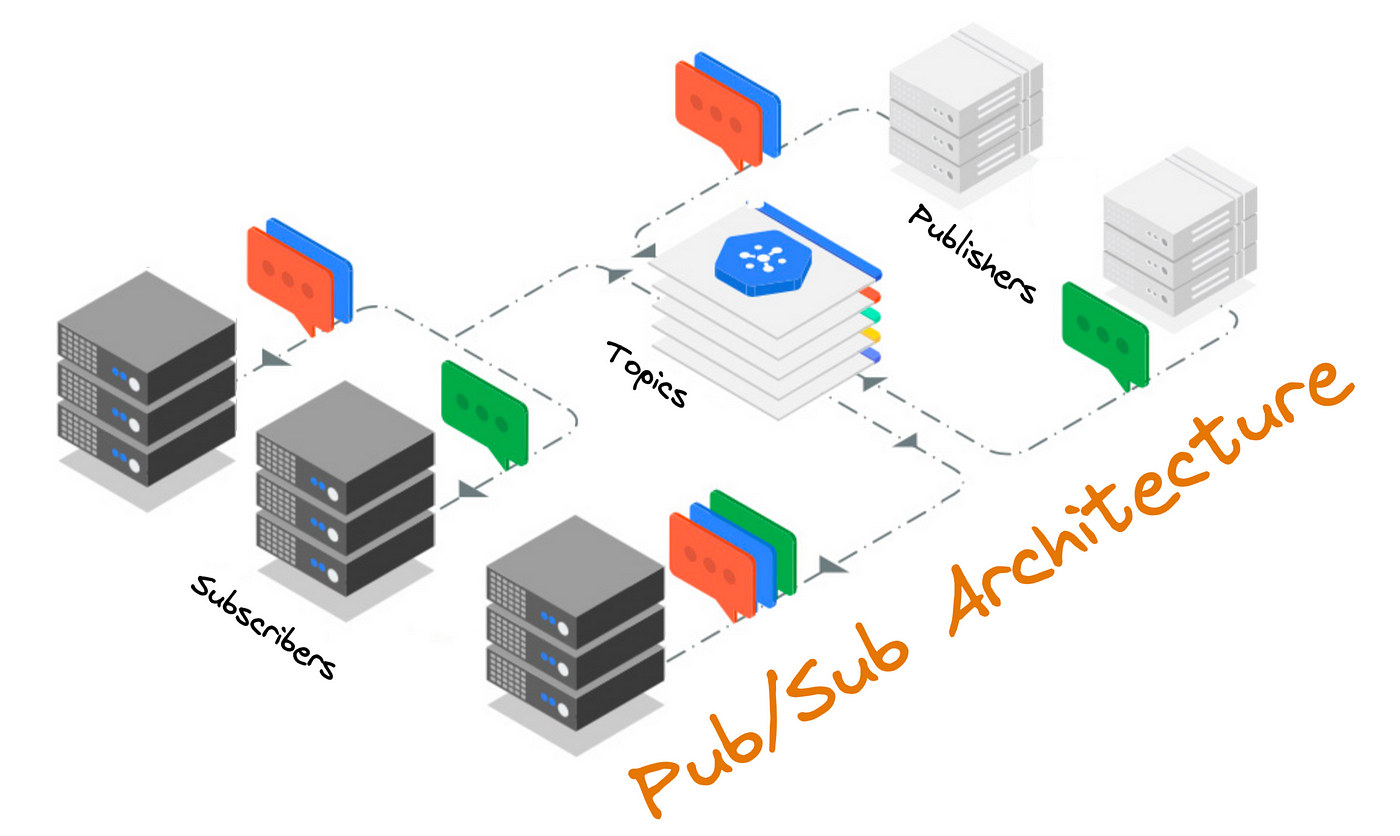

* Fonte:https://www.google.com/url?sa=i&url=https%3A%2F%2Flevelup.gitconnected.com%2Fevent-driven-systems-a-deep-dive-into-pubsub-architecture-39e416be913c&psig=AOvVaw2hxBEpNq1yJWmxqbsyzSUH&ust=1697464956766000&source=images&cd=vfe&opi=89978449&ved=0CBEQjRxqFwoTCNjkuvKb-IEDFQAAAAAdAAAAABAI

## <strong>Publisher</strong>

O script abaixo busca simular a atuação de um gerador de mensagens. Para esta demo, espera-se que você tenha uma conta e um projeto criado no GCP. Posteriormente, crie um tópico no Pub/Sub e uma subscrição para receber a mensagem recebida pelo tópico. Anote os IDs de cada um desses objetos mencionados. Além disso, no IAM do GCP solicite pela chave de acesso ao seu projeto GCP (um json será baixado na sua máquina). Esta chave precisa ser guardada com alto grau de segurança pois ele dará acesso aos recursos e permissões que você tiver atribuído.

Com isso, todos os elementos para a simulação de um Publisher estão criados. O script abaixo simula o envio de linha por linha de um arquivo .csv para o Pub/Sub e para isto, precisa de informações como: project-id do GCP, tópico, caminho do arquivo original a ser lido e caminho onde a service-account (chave json) está armazenada.

In [ ]:
import os
import time
from google.cloud import pubsub_v1

if __name__ == "__main__":

    # Replace 'my-project' with your project id
    project = 'my-project'

    # Replace 'my-topic' with your pubsub topic
    pubsub_topic = 'my-topic'

    # Replace 'my-service-account-path' with your service account path
    path_service_account = 'my-service-account-path'
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = path_service_account

    # Replace 'my-input-file-path' with your input file path
    input_file = 'my-input-file-path'

    # create publisher
    publisher = pubsub_v1.PublisherClient()

    with open(input_file, 'rb') as ifp:
        # skip header
        header = ifp.readline()

        # loop over each record
        for line in ifp:
            event_data = line   # entire line of input CSV is the message
            print('Publishing {0} to {1}'.format(event_data, pubsub_topic))
            publisher.publish(pubsub_topic, event_data)
            time.sleep(1)

## <strong>Process</strong>

Nesta etapa, temos o processamento da informação gerada no passo anterior. Aqui, a variável _input_subscription_ recebe o caminho para o qual a mensagem gerada no passo anterior foi enviada e então realiza todo o processamento necessário para continuidade do fluxo do dado. No exemplo, não existem processamentos massivos a serem realizados. O script simplesmente capta a mensagem e transporta ela a outro tópico e subscrição também no Pub/Sub.

Nesta etapa, para configurar o Apache Beam para lidar com a carga via streaming é imperativo que haja a configuração:

* **options.view_as(StandardOptions).streaming = True**

Em que _options_ trata da classe PipelineOptions()

In [ ]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions, StandardOptions
import os
from apache_beam import window


# Replace 'my-service-account-path' with your service account path
service_account_path = 'my-service-account-path'
print("Service account file : ", service_account_path)
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = service_account_path

# Replace 'my-input-subscription' with your input subscription id
input_subscription = 'my-input-subscription'

# Replace 'my-output-subscription' with your output subscription id
output_topic = 'my-output-subscription'

options = PipelineOptions()
options.view_as(StandardOptions).streaming = True

p = beam.Pipeline(options=options)


output_file = 'outputs/part'

pubsub_data = (
                p
                | 'Read from pub sub' >> beam.io.ReadFromPubSub(subscription= input_subscription)
                | 'Write to pus sub' >> beam.io.WriteToPubSub(output_topic)
              )

result = p.run()
result.wait_until_finish()

## <strong>Subscribe</strong>

Finalmente, a última etapa destina-se a olhar para a saída do passo anterior e exibir na tela do usuário as mensagens recebidas e processadas.

In [ ]:
from google.cloud import pubsub_v1
import time
import os

if __name__ == "__main__":

    # Replace 'my-service-account-path' with your service account path
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = 'my-service-account-path'

    # Replace 'my-subscription' with your subscription id
    subscription_path = 'my-subscription'

    subscriber = pubsub_v1.SubscriberClient()

    def callback(message):
        print(('Received message: {}'.format(message)))
        message.ack()

    subscriber.subscribe(subscription_path, callback=callback)

    while True:
        time.sleep(60)

# <strong>Implementing Windows in Apache Beam</strong>

O conceito de windows é crucial quando falamos de processamento de dados via streaming. Com ele, é possível definir janelas no qual uma determinada ação será executada e então coletar resultados por janela criada. Sem esse processo, operações como agrupamento de dados seriam impossíveis e retornariam erro nas pipelines criadas. O processo de criação de windows visa então particionar os dados que estão sendo recebidos de acordo com algum critério e então transformar aquele sample coletado na entrada de alguma operação a ser realizada.

Quando falamos em windows, a noção de tempo para a partição define um paradigma a ser vencido. Existem dois tipos de janelas temporais a serem consideradas na determinação de uma unidade de tempo: _event time_ e _processing time_. O primeiro, destina-se a atribuir ao dado a marcação temporal do momento em que o dado foi gerado, ou seja, o tempo verdadeiro da criação do dado. Este tipo de marcação temporal precisa lidar com problemas de latência, pois não há, em tese, um período fim no qual possamos garantir que recebemos todos os dados para um dado timestamp. A segunda opção toma como referência temporal o tempo da máquina que está processando a informação, ou seja, não é mais algo intrínseco ao dado e sim ao processo. Esta escolha implica em imprecisões, pois embora o processamento ocorra em janelas regulares de tempo, pode-se ter ausência de dados que afetem a acurácia da informação gerada.

No Apache Beam, existem 4 tipos de janelas possíveis, detalhadas a seguir, sendo elas:

* Tumbling Windows
* Sliding Windows
* Sessions Windows
* Global Windows

## <strong>Tumbling Windows</strong>

Tumbling Windows, assim como Sliding Windows, são janelas baseadas em tempo. Tumbling Windows são janelas criadas a cada período específico de tempo e possui como característica o fato de que uma janela é iniciada apenas quando a anterior fechou sua coleta de dados naquele período de tempo. Sliding Windows, por outro lado, também definem janelas que atuam por um determinado período de tempo mas possuem como diferença o fato de que não é preciso esperar que uma janela termina para que outra seja criada. Por exemplo, podemos ter janelas que processam dados no período de 1 minuto mas que são criadas a cada 30 segundos.

A seguir teremos duas versões de scripts, a primeira baseada no conceito de _event time_ mencionado acima e a segunda baseada no conceito de _processing time_. A ideia de execução deste processo é análoga ao método apresentado no capítulo anterior, podendo manter os scripts de publish e subscribe praticamente os mesmos. A ideia é que os scripts a seguir sejam a camada de processamento do dado.

O pipeline consiste no seguinte:

* Ler os dados de um tópico do Pub/Sub com o método _beam.io.ReadFromPubSub()_.
* Limpar os dados, retirando espaços extras (como vêm do Pub/Sub)
* Aplicar um split para então armazenar cada elemento de uma linha como elemento de uma lista, dado um separador (',').
* Filtragem dos dados para computar operações apenas sobre um conjunto específico dada as condições do filtro.
* Criação de uma "coluna" que computa o lucro: função _calculateProfit_.
* Para o caso de _event time_, é necessário determinar qual coluna encontra-se o elemento que deve ser considerado como timestamp para as operações: função _custom_timestamp_.
* Criação de um Map que consolida a chave e o valor requisitado (lucro calculado).
* Criação da janela para o cálculo a cada 20 segundos com o seguinte comando: _beam.WindowInto(window.FixedWindows(20))_.
* Realizar o agrupamento dos cálculos através do método _CombinePerKey(sum)_.
* Converter os resultados realizando um encoding no formato aceito pelo Pub/Sub: função _encode_byte_string_.
* Enviar os dados para o tópico/subscrição de interesse.

### <strong>Event Time</strong>

In [ ]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions, StandardOptions
import os
from apache_beam import window
from apache_beam.transforms.trigger import AfterWatermark, AfterProcessingTime, AccumulationMode, AfterCount

# Replace with your service account path
service_account_path = ''

print("Service account file : ", service_account_path)
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = service_account_path

# Replace with your input subscription id
input_subscription = ''

# Replace with your output subscription id
output_topic = ''

options = PipelineOptions()
options.view_as(StandardOptions).streaming = True

p = beam.Pipeline(options=options)

def encode_byte_string(element):

   element = str(element)
   return element.encode('utf-8')

def custom_timestamp(elements):
  unix_timestamp = elements[7]
  return beam.window.TimestampedValue(elements, int(unix_timestamp))

def calculateProfit(elements):
  buy_rate = elements[5]
  sell_price = elements[6]
  products_count = int(elements[4])
  profit = (int(sell_price) - int(buy_rate)) * products_count
  elements.append(str(profit))
  return elements

pubsub_data= (
                p
                | 'Read from pub sub' >> beam.io.ReadFromPubSub(subscription= input_subscription,timestamp_attribute = 1553578219)
                # STR_2,Mumbai,PR_265,Cosmetics,8,39,66,1553578219/r/n

                | 'Remove extra chars' >> beam.Map(lambda data: (data.rstrip().lstrip()))          # STR_2,Mumbai,PR_265,Cosmetics,8,39,66,1553578219
                | 'Split Row' >> beam.Map(lambda row : row.split(','))                             # [STR_2,Mumbai,PR_265,Cosmetics,8,39,66,1553578219]
                | 'Filter By Country' >> beam.Filter(lambda elements : (elements[1] == "Mumbai" or elements[1] == "Bangalore"))
                | 'Create Profit Column' >> beam.Map(calculateProfit)                              # [STR_2,Mumbai,PR_265,Cosmetics,8,39,66,1553578219,27]
                | 'Apply custom timestamp' >> beam.Map(custom_timestamp)
                | 'Form Key Value pair' >> beam.Map(lambda elements : (elements[0], int(elements[8])))  # STR_2 27
                | 'Window' >> beam.WindowInto(window.FixedWindows(20))
                | 'Sum values' >> beam.CombinePerKey(sum)
                | 'Encode to byte string' >> beam.Map(encode_byte_string)  #Pubsub takes data in form of byte strings
                | 'Write to pus sub' >> beam.io.WriteToPubSub(output_topic)
	             )

result = p.run()
result.wait_until_finish()

### <strong>Processing Time</strong>

In [ ]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions, StandardOptions
import os
from apache_beam import window
from apache_beam.transforms.trigger import AfterWatermark, AfterProcessingTime, AccumulationMode, AfterCount

# Replace with your service account path
service_account_path = ''

print("Service account file : ", service_account_path)
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = service_account_path

# Replace with your input subscription id
input_subscription = ''

# Replace with your output subscription id
output_topic = ''

options = PipelineOptions()
options.view_as(StandardOptions).streaming = True

p = beam.Pipeline(options=options)

def encode_byte_string(element):
   print element
   element = str(element)
   return element.encode('utf-8')

def calculateProfit(elements):
  buy_rate = elements[5]
  sell_price = elements[6]
  products_count = int(elements[4])
  profit = (int(sell_price) - int(buy_rate)) * products_count
  elements.append(str(profit))
  return elements

pubsub_data= (
                p
                | 'Read from pub sub' >> beam.io.ReadFromPubSub(subscription= input_subscription)
                # STR_2,Mumbai,PR_265,Cosmetics,8,39,66/r/n

                | 'Remove extra chars' >> beam.Map(lambda data: (data.rstrip().lstrip()))          # STR_2,Mumbai,PR_265,Cosmetics,8,39,66,
                | 'Split Row' >> beam.Map(lambda row : row.split(','))                             # [STR_2,Mumbai,PR_265,Cosmetics,8,39,66,]
                | 'Filter By Country' >> beam.Filter(lambda elements : (elements[1] == "Mumbai" or elements[1] == "Bangalore"))
                | 'Create Profit Column' >> beam.Map(calculateProfit)                              # [STR_2,Mumbai,PR_265,Cosmetics,8,39,66,27]
                | 'Form Key Value pair' >> beam.Map(lambda elements : (elements[0], int(elements[7])))  # STR_2 27
                | 'Window' >> beam.WindowInto(window.FixedWindows(20))
                | 'Sum values' >> beam.CombinePerKey(sum)
                | 'Encode to byte string' >> beam.Map(encode_byte_string)  #Pubsub takes data in form of byte strings
                | 'Write to pus sub' >> beam.io.WriteToPubSub(output_topic)
	             )

result = p.run()
result.wait_until_finish()

## <strong>Sliding Windows</strong>

O objetivo é mostrar um exemplo em que calcula-se o lucro dado o recebimento de informações de vendas. O pipeline enxerga um determinado tópico do Pub/Sub, realiza alguns tratamentos e filtros e cria uma sliding window de 30 segundos, com updates a cada 10 segundos. A diferença entre os dois códigos a seguir é que em um o timestamp é pré-determinado por uma coluna presente no dado e no outro caso utiliza-se o valor da máquina no qual a execução está ocorrendo.

In [ ]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions, StandardOptions
import os
from apache_beam import window
from apache_beam.transforms.trigger import AfterWatermark, AfterProcessingTime, AccumulationMode, AfterCount


# Replace 'my-service-account-path' with your service account path
service_account_path = ''
print("Service account file : ", service_account_path)
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = service_account_path

# Replace 'my-input-subscription' with your input subscription id
input_subscription = ''

# Replace 'my-output-subscription' with your output subscription id
output_topic = ''

options = PipelineOptions()
options.view_as(StandardOptions).streaming = True

p = beam.Pipeline(options=options)

def encode_byte_string(element):
   print element
   element = str(element)
   return element.encode('utf-8')

def custom_timestamp(elements):
  unix_timestamp = elements[7]
  return beam.window.TimestampedValue(elements, int(unix_timestamp))

def calculateProfit(elements):
  buy_rate = elements[5]
  sell_price = elements[6]
  products_count = int(elements[4])
  profit = (int(sell_price) - int(buy_rate)) * products_count
  elements.append(str(profit))
  return elements

pubsub_data = (
                p
                | 'Read from pub sub' >> beam.io.ReadFromPubSub(subscription= input_subscription)
                | 'Remove extra chars' >> beam.Map(lambda data: (data.rstrip().lstrip()))
                | 'Split Row' >> beam.Map(lambda row : row.split(','))
                | 'Filter By Country' >> beam.Filter(lambda elements : (elements[1] == "Mumbai" or elements[1] == "Bangalore"))
                | 'Create Profit Column' >> beam.Map(calculateProfit)
                | 'Apply custom timestamp' >> beam.Map(custom_timestamp)
                | 'Form Key Value pair' >> beam.Map(lambda elements : (elements[0], int(elements[8])))
                # Please change the time of gap of window duration and period accordingly
                | 'Window' >> beam.WindowInto(window.SlidingWindows(30,10))
                | 'Sum values' >> beam.CombinePerKey(sum)
                | 'Encode to byte string' >> beam.Map(encode_byte_string)
                | 'Write to pus sub' >> beam.io.WriteToPubSub(output_topic)
              )

result = p.run()
result.wait_until_finish()

In [ ]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions, StandardOptions
import os
from apache_beam import window
from apache_beam.transforms.trigger import AfterWatermark, AfterProcessingTime, AccumulationMode, AfterCount


# Replace 'my-service-account-path' with your service account path
service_account_path = ''
print("Service account file : ", service_account_path)
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = service_account_path

# Replace 'my-input-subscription' with your input subscription id
input_subscription = ''

# Replace 'my-output-subscription' with your output subscription id
output_topic = ''

options = PipelineOptions()
options.view_as(StandardOptions).streaming = True

p = beam.Pipeline(options=options)

def encode_byte_string(element):
   print element
   element = str(element)
   return element.encode('utf-8')

def calculateProfit(elements):
  buy_rate = elements[5]
  sell_price = elements[6]
  products_count = int(elements[4])
  profit = (int(sell_price) - int(buy_rate)) * products_count
  elements.append(str(profit))
  return elements

pubsub_data = (
                p
                | 'Read from pub sub' >> beam.io.ReadFromPubSub(subscription= input_subscription)
                | 'Remove extra chars' >> beam.Map(lambda data: (data.rstrip().lstrip()))
                | 'Split Row' >> beam.Map(lambda row : row.split(','))
                | 'Filter By Country' >> beam.Filter(lambda elements : (elements[1] == "Mumbai" or elements[1] == "Bangalore"))
                | 'Create Profit Column' >> beam.Map(calculateProfit)
                #| 'Apply custom timestamp' >> beam.Map(custom_timestamp)
                | 'Form Key Value pair' >> beam.Map(lambda elements : (elements[0], int(elements[7])))
                | 'Window' >> beam.WindowInto(window.SlidingWindows(30,10))
                | 'Sum values' >> beam.CombinePerKey(sum)
                | 'Encode to byte string' >> beam.Map(encode_byte_string)
                | 'Write to pus sub' >> beam.io.WriteToPubSub(output_topic)
              )

result = p.run()
result.wait_until_finish()

## <strong>Session Windows</strong>

Baseado na atividade de uma sessão criada, ou seja, a partir de um valor pré-definido como o limite de uma sessão, os valores são acumulados até que haja um gap de tempo igual ao valor definido, encerrando-se assim a janela criada.

No exemplo a seguir temos duas células de código. A primeira, simula o envio de dados via Pub/Sub para um tópico criado no serviço do GCP e o segundo descreve uma pipeline que monitora este tópico, trata o texto recebido retirando caracteres como " " ou "\n" de sua estrutura, realizando posteriormente um split por linha para separa os elementos (separador é a vírgula). Com isso, um filtro é realizado para pegar um recorte dos eventos enviados e então associa-se um timestamp baseado na oitava coluna do dado recebido. Por fim, gera-se uma tupla cujo a chave é uma determinada coluna categórica do dado e o valor representativo da quantidade associada. Com isso, cria-se a janela temporal com o valor de 15 segundos de inatividade e então a agregação via CombinePerKey é realizada para agrupar e contar os valores por chave. O resultado final é então encodificado e enviado para um tópico do Pub/Sub.

In [ ]:
import os
import time
from google.cloud import pubsub_v1

if __name__ == "__main__":

    # Replace 'my-project' with your project id
    project = ''

    # Replace 'my-topic' with your pubsub topic
    pubsub_topic = ''

    # Replace 'my-service-account-path' with your service account path
    path_service_account = ''
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = path_service_account

    # Replace 'my-input-file-path' with your input file path
    input_file = ''

    # create publisher
    publisher = pubsub_v1.PublisherClient()

    with open(input_file, 'rb') as ifp:
        # skip header
        header = ifp.readline()

        # loop over each record
        for i, line in enumerate(ifp):
            event_data = line   # entire line of input CSV is the message
            print('Publishing {0} to {1}'.format(event_data, pubsub_topic))
            publisher.publish(pubsub_topic, event_data)
            time.sleep(1)
            if i%20 == 0:
                time.sleep(20)

In [ ]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions, StandardOptions
import os
from apache_beam import window
from apache_beam.transforms.trigger import AfterWatermark, AfterProcessingTime, AccumulationMode, AfterCount


# Replace 'my-service-account-path' with your service account path
service_account_path = ''
print("Service account file : ", service_account_path)
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = service_account_path

# Replace 'my-input-subscription' with your input subscription id
input_subscription = ''

# Replace 'my-output-subscription' with your output subscription id
output_topic = ''

options = PipelineOptions()
options.view_as(StandardOptions).streaming = True

p = beam.Pipeline(options=options)

def encode_byte_string(element):
   print element
   element = str(element)
   return element.encode('utf-8')

def custom_timestamp(elements):
  unix_timestamp = elements[7]

  return beam.window.TimestampedValue(elements, int(unix_timestamp))

pubsub_data = (
                p
                | 'Read from pub sub' >> beam.io.ReadFromPubSub(subscription= input_subscription)
                | 'Remove extra chars' >> beam.Map(lambda data: (data.rstrip().lstrip()))
                | 'Split Row' >> beam.Map(lambda row : row.split(','))
                | 'Filter By Country' >> beam.Filter(lambda elements : (elements[1] == "Mumbai" or elements[1] == "Bangalore"))
                | 'Apply custom timestamp and extract pieces sold' >> beam.Map(custom_timestamp)
                | 'Form Key Value pair' >> beam.Map(lambda elements : (elements[3], int(elements[4])))
                # Please change the time of gap of window duration and period accordingly
                | 'Window' >> beam.WindowInto(window.Sessions(15))
                | 'Sum values' >> beam.CombinePerKey(sum)
                | 'Encode to byte string' >> beam.Map(encode_byte_string)
                | 'Write to pus sub' >> beam.io.WriteToPubSub(output_topic)
              )

result = p.run()
result.wait_until_finish()

## <strong>Global Windows</strong>

Global Windows diferem das demais pelo fato de que são criadas janelas únicas por chave, ou seja, apenas uma janela que acumula todo o dado histórico para uma determinada chave mapeada. Com isso, para a realização de cálculos e agregações a alternativa é utilizar triggers que permitam, a partir da verificação de determinada condição, o disparo da ação de realizar algum processamento computacional (cálculo matemático). O exemplo a seguir é bem similar ao utilizado para aprensetar os conceitos anteriores em relação ao tipo de "windows", com a diferença da inserção de uma Global Window cujo trigger é a contagem de 10 dados recebidos para uma dada chave.

In [ ]:
import os
import time
from google.cloud import pubsub_v1

if __name__ == "__main__":

       # Replace  with your project id
    project = ''

    # Replace  with your pubsub topic
    pubsub_topic = ''

    # Replace with your service account path
    path_service_account = ''

    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = path_service_account

    # Replace  with your input file path
    input_file = ''

    # create publisher
    publisher = pubsub_v1.PublisherClient()

    with open(input_file, 'rb') as ifp:
        # skip header
        header = ifp.readline()

        # loop over each record
        for line in ifp:
            event_data = line   # entire line of input CSV is the message
            print('Publishing {0} to {1}'.format(event_data, pubsub_topic))
            publisher.publish(pubsub_topic, event_data)
            time.sleep(1)

In [ ]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions, StandardOptions
import os
from apache_beam import window
from apache_beam.transforms.trigger import AfterWatermark, AfterProcessingTime, AccumulationMode, AfterCount,Repeatedly

# Replace with your service account path
service_account_path = ''

print("Service account file : ", service_account_path)
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = service_account_path

# Replace with your input subscription id
input_subscription = ''

# Replace with your output subscription id
#output_topic = ''

options = PipelineOptions()
options.view_as(StandardOptions).streaming = True

p = beam.Pipeline(options=options)

def encode_byte_string(element):
   print element
   element = str(element)
   return element.encode('utf-8')

def custom_timestamp(elements):
  unix_timestamp = elements[7]
  return beam.window.TimestampedValue(elements, int(unix_timestamp))

def calculateProfit(elements):
  buy_rate = elements[5]
  sell_price = elements[6]
  products_count = int(elements[4])
  profit = (int(sell_price) - int(buy_rate)) * products_count
  elements.append(str(profit))
  return elements

pubsub_data = (
                p
                | 'Read from pub sub' >> beam.io.ReadFromPubSub(subscription= input_subscription)
                | 'Remove extra chars' >> beam.Map(lambda data: (data.rstrip().lstrip()))
                | 'Split Row' >> beam.Map(lambda row : row.split(','))
                | 'Filter By Country' >> beam.Filter(lambda elements : (elements[1] == "Mumbai" or elements[1] == "Bangalore"))
                | 'Create Profit Column' >> beam.Map(calculateProfit)
                | 'Apply custom timestamp' >> beam.Map(custom_timestamp)
                | 'Form Key Value pair' >> beam.Map(lambda elements : (elements[0], int(elements[7])))
                # Please change the time of gap of window duration and period accordingly
                | 'Window' >> beam.WindowInto(window.GlobalWindows(), trigger=Repeatedly(AfterCount(10)), accumulation_mode=AccumulationMode.DISCARDING)
                | 'Sum values' >> beam.CombinePerKey(sum)
                | 'Encode to byte string' >> beam.Map(encode_byte_string)
               # | 'Write to pus sub' >> beam.io.WriteToPubSub(output_topic)
              )

result = p.run()
result.wait_until_finish()

# <strong>Considerações Finais</strong>

O curso é composto por mais seções do que as apresentadas até o momento. Existe um tópico dedicado apenas para explicar o funcionamento de triggers (que auxilia no entendimento do script acima) além de conteúdo bônus e maiores exemplos de casos reais e implementações utilizando serviços em nuvem como o Dataflow e o BigQuery. Espero que tenha conseguido notar o valor do curso e entendido o poder do Apache Beam até aqui. Espero que possa comprar o curso completo e ter acesso às aulas e materiais originais fornecidos pelo instrutor. Obrigado por chegar até aqui e bons estudos!